#  Coding Assignment - Python


## Cleaning Data

In [1]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")
import os

In [422]:
# setting wd
os.chdir('/Users/ina/Desktop/ceu/coding_class/assignment/osfstorage-archive/raw')
print(os.getcwd())

/Users/ina/Desktop/ceu/coding_class/assignment/osfstorage-archive/raw


In [423]:
# reading in the data and getting an overview
airbnb=pd.read_csv("airbnb_london_listing.csv", encoding="utf-8",low_memory=False)
airbnb.head()

,Unnamed: 0,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1,15896822,20170304065726,69018624,Dafina,2016-04-26,100%,NaN,f,RB of Kingston upon Thames,...,10.0,f,NaN,NaN,f,flexible,f,f,1,0.32
1,2,4836957,20170304065726,18154504,Anas,2014-07-15,100%,NaN,f,RB of Kingston upon Thames,...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.67
2,3,13355982,20170304065726,75741819,Maria,2016-06-04,NaN,NaN,f,RB of Kingston upon Thames,...,8.0,f,NaN,NaN,f,flexible,f,f,1,0.25
3,4,13472704,20170304065726,77078182,Hannah,2016-06-11,NaN,NaN,f,RB of Kingston upon Thames,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
4,5,17430865,20170304065726,113972982,Jung Kyung,2017-01-30,100%,NaN,f,RB of Kingston upon Thames,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [424]:
# We seem to not be able to view all of our variables do to the size of our dataset; display only a chunk:
airbnb.iloc[:, 0:15].head()

,Unnamed: 0,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
0,1,15896822,20170304065726,69018624,Dafina,2016-04-26,100%,NaN,f,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'facebook']",t,f
1,2,4836957,20170304065726,18154504,Anas,2014-07-15,100%,NaN,f,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t
2,3,13355982,20170304065726,75741819,Maria,2016-06-04,NaN,NaN,f,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'reviews']",t,f
3,4,13472704,20170304065726,77078182,Hannah,2016-06-11,NaN,NaN,f,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone']",t,f
4,5,17430865,20170304065726,113972982,Jung Kyung,2017-01-30,100%,NaN,f,RB of Kingston upon Thames,1.0,1.0,"['email', 'phone', 'google', 'jumio', 'offline...",t,t


In [425]:
# checking if the numerical variables are actually saved as numbers
print(airbnb[["id", "scrape_id", "host_id", "host_since", "host_response_rate", "host_listings_count"]].dtypes)

id                       int64
scrape_id                int64
host_id                  int64
host_since              object
host_response_rate      object
host_listings_count    float64
dtype: object


In [427]:
# checking for NA's in "host_since"
airbnb["host_since"].isnull().sum()
airbnb = airbnb.loc[airbnb["host_since"].notnull()]
airbnb["host_since"].isnull().sum()

0

In [428]:
# checking for NA's in "host_response_rate
airbnb["host_response_rate"].isnull().sum()
airbnb = airbnb.loc[airbnb["host_response_rate"].notnull()]
airbnb["host_response_rate"].isnull().sum()

0

In [430]:
# dropping NAs in "host_neighbourhood"
airbnb["host_neighbourhood"].isnull().sum()
airbnb = airbnb.loc[airbnb["host_neighbourhood"].notnull()]

In [431]:
# Remove the '%' sign, then convert to float
airbnb["host_response_rate"] = airbnb["host_response_rate"].str.replace('%', '').astype(float) / 100

In [461]:
# dropping "Unnamed: 0" because it's only a count variable
airbnb=airbnb.drop(columns = ["Unnamed: 0"])

In [ ]:
# dropping "" as it's only NAs
airbnb=airbnb.drop(columns = [{"host_acceptance_rate"])

In [433]:
# Replace 'f' with 0 and 't' with 1 in the whole DataFrame
airbnb.replace({'f': 0, 't': 1}, inplace=True)

variable chunk #2

In [434]:
airbnb.iloc[:, 14:30].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type
0,"A Thames Street, Kingston upon Thames, England...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,England,KT1 1PE,London,"Kingston upon Thames, United Kingdom",GB,United Kingdom,51.410036,-0.306323,1,Apartment,Private room
1,"London Road, Kingston upon Thames, Greater Lon...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,Greater London,KT2 6QS,London,"Kingston upon Thames, United Kingdom",GB,United Kingdom,51.411482,-0.290704,1,Apartment,Private room
4,"Kingston Road, New Malden, England KT3 3RX, Un...",RB of Kingston upon Thames,Kingston upon Thames,NaN,New Malden,England,KT3 3RX,London,"New Malden, United Kingdom",GB,United Kingdom,51.404285,-0.275426,1,House,Private room
12,"Sussex Road, New Malden, KT3 3PY, United Kingdom",RB of Kingston upon Thames,Kingston upon Thames,NaN,New Malden,NaN,KT3 3PY,London,"New Malden, United Kingdom",GB,United Kingdom,51.401760,-0.255244,1,House,Private room
16,"Abinger House, Kingsnympton Park, Kingston upo...",RB of Kingston upon Thames,Kingston upon Thames,NaN,Kingston upon Thames,England,KT2 7RW,London,"Kingston upon Thames, United Kingdom",GB,United Kingdom,51.421323,-0.278367,1,Apartment,Private room


In [435]:
# neighbourhood_group_cleansed is NAs only, I drop it
airbnb=airbnb.drop(columns = ["neighbourhood_group_cleansed"])

In [436]:
# checking if numbers are saved as numeric variables
print(airbnb[["latitude", "longitude", "is_location_exact"]].dtypes)

latitude             float64
longitude            float64
is_location_exact      int64
dtype: object


variable chunk #3

In [437]:
airbnb.iloc[:, 29:45].head()

,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Washer,""Smoke det...",NaN,$23.00,NaN,NaN,NaN,NaN,1,$8.00,7,1125
1,2,1.0,1.0,1.0,Pull-out Sofa,"{TV,Internet,""Wireless Internet"",""Free parking...",NaN,$50.00,$300.00,NaN,NaN,NaN,1,$0.00,1,1125
4,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,Breakfast,Heating...",NaN,$25.00,NaN,NaN,NaN,NaN,1,$0.00,1,14
12,2,0.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",NaN,$32.00,NaN,NaN,NaN,$10.00,1,$0.00,1,4
16,1,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",NaN,$23.00,NaN,NaN,NaN,$10.00,1,$10.00,1,15


In [438]:
# which variables should we drop?
airbnb[["square_feet", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee"]].notnull().sum()
# I guess we can't drop any

square_feet           403
weekly_price         6859
monthly_price        5597
security_deposit    15521
cleaning_fee        21055
dtype: int64

In [439]:
# removing NAs
airbnb = airbnb.loc[airbnb["square_feet"].notnull()]
airbnb = airbnb.loc[airbnb["weekly_price"].notnull()]
airbnb = airbnb.loc[airbnb["monthly_price"].notnull()]
airbnb = airbnb.loc[airbnb["security_deposit"].notnull()]
airbnb = airbnb.loc[airbnb["cleaning_fee"].notnull()]

In [440]:
# are there strings among them?
print(airbnb[["square_feet", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]].dtypes)

square_feet         float64
weekly_price         object
monthly_price        object
security_deposit     object
cleaning_fee         object
extra_people         object
dtype: object


In [441]:
# destringing "weekly_price", "monthly_price", "security_deposit", "cleaning_fee"
airbnb["weekly_price"] = airbnb["weekly_price"].str.replace(',', '').astype(str)
airbnb["weekly_price"] = airbnb["weekly_price"].str.replace("$", "").astype(float)

In [442]:
# destringing "monthly_price"
airbnb["monthly_price"] = airbnb["monthly_price"].str.replace(',', '').astype(str)
airbnb["monthly_price"] = airbnb["monthly_price"].str.replace("$", "").astype(float)

In [443]:
# destringing "security_deposit"
airbnb["security_deposit"] = airbnb["security_deposit"].str.replace(',', '').astype(str)
airbnb["security_deposit"] = airbnb["security_deposit"].str.replace("$", "").astype(float)

In [444]:
# destringing "cleaning_fee"
airbnb["cleaning_fee"] = airbnb["cleaning_fee"].str.replace(',', '').astype(str)
airbnb["cleaning_fee"] = airbnb["cleaning_fee"].str.replace("$", "").astype(float)

In [445]:
# destringing "price"
airbnb["price"] = airbnb["price"].str.replace(',', '').astype(str)
airbnb["price"] = airbnb["price"].str.replace("$", "").astype(float)

In [446]:
# destringing "extra_people"
# destringing "price"
airbnb["extra_people"] = airbnb["extra_people"].str.replace(',', '').astype(str)
airbnb["extra_people"] = airbnb["extra_people"].str.replace("$", "").astype(float)

In [447]:
airbnb[["weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "price", "extra_people"]].head()

,weekly_price,monthly_price,security_deposit,cleaning_fee,price,extra_people
2243,495.0,1395.0,100.0,40.0,55.0,49.0
3743,250.0,999.0,100.0,10.0,36.0,20.0
4060,550.0,1875.0,250.0,40.0,85.0,20.0
4496,600.0,2100.0,150.0,40.0,90.0,0.0
6242,360.0,1500.0,150.0,18.0,60.0,15.0


variable chunk #4

In [448]:
airbnb.iloc[:, 44:60].head()

,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
2243,1125,yesterday,NaN,0,0,0,259,2017-03-04,5,2016-09-10,2017-02-12,92.0,10.0,10.0,10.0,10.0
3743,180,3 weeks ago,NaN,0,0,21,296,2017-03-05,54,2011-05-24,2017-02-04,95.0,9.0,9.0,10.0,10.0
4060,32,5 days ago,NaN,11,23,33,125,2017-03-04,6,2014-07-18,2016-12-10,93.0,10.0,10.0,10.0,9.0
4496,100,3 days ago,NaN,0,8,22,277,2017-03-05,28,2012-12-20,2017-01-22,96.0,10.0,10.0,10.0,10.0
6242,1125,6 days ago,NaN,0,0,0,0,2017-03-04,127,2014-10-24,2017-02-15,92.0,9.0,9.0,10.0,10.0


In [449]:
# check if has_availabilities is NAs only
airbnb["square_feet"].notnull().sum()

98

In [450]:
# 122 observations are not very many - we'll drop the variable!
airbnb=airbnb.drop(columns = ["has_availability"])

In [451]:
# check if any numerics are stored as strings
print(airbnb[["extra_people",
              "minimum_nights",
              "maximum_nights",
              "availability_30",
              "availability_60",
              "availability_90", 
              "availability_365", 
              "calendar_last_scraped",
              "number_of_reviews", 
              "first_review", 
              "last_review", 
              "review_scores_rating",
              "review_scores_accuracy",
              "review_scores_cleanliness" ]].dtypes)
# only dates are not stored as numbers, which I will leave this way due to time constraints

extra_people                 float64
minimum_nights                 int64
maximum_nights                 int64
availability_30                int64
availability_60                int64
availability_90                int64
availability_365               int64
calendar_last_scraped         object
number_of_reviews              int64
first_review                  object
last_review                   object
review_scores_rating         float64
review_scores_accuracy       float64
review_scores_cleanliness    float64
dtype: object


In [452]:
# drop NAs (I feel like there must be an easier way to do this...)
airbnb = airbnb.loc[airbnb["extra_people"].notnull()]
airbnb = airbnb.loc[airbnb["minimum_nights"].notnull()]
airbnb = airbnb.loc[airbnb["maximum_nights"].notnull()]
airbnb = airbnb.loc[airbnb["availability_30"].notnull()]
airbnb = airbnb.loc[airbnb["availability_60"].notnull()]
airbnb = airbnb.loc[airbnb["availability_90"].notnull()]
airbnb = airbnb.loc[airbnb["availability_365"].notnull()]
airbnb = airbnb.loc[airbnb["calendar_last_scraped"].notnull()]
airbnb = airbnb.loc[airbnb["number_of_reviews"].notnull()]
airbnb = airbnb.loc[airbnb["first_review"].notnull()]
airbnb = airbnb.loc[airbnb["last_review"].notnull()]
airbnb = airbnb.loc[airbnb["review_scores_rating"].notnull()]
airbnb = airbnb.loc[airbnb["review_scores_accuracy"].notnull()]
airbnb = airbnb.loc[airbnb["review_scores_cleanliness"].notnull()]

variable chunk #5

In [454]:
airbnb.iloc[:, 60:].head()

,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2243,10.0,0,NaN,NaN,0,strict,0,0,1,0.85
3743,9.0,0,NaN,NaN,0,strict,1,1,1,0.77
4060,9.0,0,NaN,NaN,1,strict,0,1,2,0.19
4496,9.0,0,NaN,NaN,0,strict,0,0,1,0.55
6242,9.0,0,NaN,NaN,0,moderate,0,0,6,4.41


In [455]:
# are "license" and "jurisdiction_names" NAs only?
airbnb[["license", "jurisdiction_names"]].notnull().sum()
# yes - we drop them

license               0
jurisdiction_names    0
dtype: int64

In [456]:
airbnb=airbnb.drop(columns = ["license", "jurisdiction_names", "amenities", "host_verifications"])
# sorry for dropping "amenities" and "host_verifications", I just didn't get time to figure out how to clean them properly :/

In [457]:
print(airbnb[["review_scores_communication",
              "review_scores_location", "review_scores_value", "calculated_host_listings_count", "reviews_per_month"]].dtypes)

review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object


In [462]:
airbnb.head()

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2243,42053,20170304065726,183802,Anne,2010-07-28,1.00,0,LB of Ealing,2.0,2.0,...,10.0,10.0,10.0,0,0,strict,0,0,1,0.85
3743,96052,20170304065726,448154,Aneta,2011-03-17,1.00,0,LB of Brent,1.0,1.0,...,10.0,9.0,9.0,0,0,strict,1,1,1,0.77
4060,960285,20170304065726,1814506,Allan,2012-02-26,1.00,0,LB of Brent,3.0,3.0,...,9.0,9.0,9.0,0,1,strict,0,1,2,0.19
4496,609973,20170304065726,3011339,Patrizia,2012-07-21,0.90,0,LB of Brent,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.55
6242,428500,20170304065726,1955559,Sean,2012-03-18,0.89,0,LB of Enfield,6.0,6.0,...,10.0,9.0,9.0,0,0,moderate,0,0,6,4.41


In [ ]:
# saving the data
os.chdir("/Users/ina/Desktop/ceu/coding_class/assignment/Python")
airbnb.to_csv("cleaned_data_python", sep=',', index=False, encoding='utf-8')

## Operations in Python: Creating summary statistics, graphs etc.

In [60]:
os.chdir("/Users/ina/Desktop/ceu/coding_class/assignment/Python")
airbnb_clean=pd.read_csv("cleaned_data_python", encoding="utf-8",low_memory=False)
airbnb_clean.head()

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,42053,20170304065726,183802,Anne,2010-07-28,1.00,0,LB of Ealing,2.0,2.0,...,10.0,10.0,10.0,0,0,strict,0,0,1,0.85
1,96052,20170304065726,448154,Aneta,2011-03-17,1.00,0,LB of Brent,1.0,1.0,...,10.0,9.0,9.0,0,0,strict,1,1,1,0.77
2,960285,20170304065726,1814506,Allan,2012-02-26,1.00,0,LB of Brent,3.0,3.0,...,9.0,9.0,9.0,0,1,strict,0,1,2,0.19
3,609973,20170304065726,3011339,Patrizia,2012-07-21,0.90,0,LB of Brent,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.55
4,428500,20170304065726,1955559,Sean,2012-03-18,0.89,0,LB of Enfield,6.0,6.0,...,10.0,9.0,9.0,0,0,moderate,0,0,6,4.41


#### create a summary statistics table

In [6]:
import warnings

import numpy as np
import pandas as pd
from skimpy import skim

%matplotlib inline
warnings.filterwarnings("ignore")

In [469]:
airbnb_clean.describe()

,id,scrape_id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.000000,93.000000
mean,8.433353e+05,2.017030e+13,2.888555e+06,0.948065,0.204301,3.462366,3.462366,0.989247,0.741935,51.513971,...,9.698925,9.655914,9.387097,9.172043,0.0,0.086022,0.193548,0.172043,2.634409,1.059462
std,7.509050e+05,0.000000e+00,3.054479e+06,0.174700,0.405375,6.261614,6.261614,0.103695,0.439941,0.038304,...,0.547424,0.914789,0.659912,0.951242,0.0,0.281916,0.397220,0.379463,3.761316,1.331753
min,1.391300e+04,2.017030e+13,4.175900e+04,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,51.425356,...,8.000000,4.000000,8.000000,2.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.010000
25%,4.027890e+05,2.017030e+13,1.441235e+06,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,51.493070,...,9.000000,10.000000,9.000000,9.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.210000
50%,6.084380e+05,2.017030e+13,2.196876e+06,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,51.518477,...,10.000000,10.000000,9.000000,9.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.550000
75%,1.088930e+06,2.017030e+13,3.921373e+06,1.000000,0.000000,3.000000,3.000000,1.000000,1.000000,51.537449,...,10.000000,10.000000,10.000000,10.000000,0.0,0.000000,0.000000,0.000000,3.000000,1.500000
max,5.286634e+06,2.017030e+13,2.381432e+07,1.000000,1.000000,37.000000,37.000000,1.000000,1.000000,51.617917,...,10.000000,10.000000,10.000000,10.000000,0.0,1.000000,1.000000,1.000000,24.000000,8.230000


In [470]:
skim(airbnb_clean)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 93     │ │ float64     │ 23    │                                                          │
│ │ Number of columns │ 65     │ │ int64       │ 21    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 21    │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃         ┃          ┃          ┃          ┃          ┃           ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │  0 │    0 │   843300 │  750900 │    13910 │   402800 │   608400 │  1089000 │   5287000 │  ▇▃▁   │  │
│ │ scrape_i │  0 │    0 │ 20170000 │       0 │ 20170000 │ 20170000 │ 20170000 │ 20170000 │ 201700000 │     ▇  │  │
│ │ d        │    │      │   000000 │         │   000000 │   000000 │   000000 │   000000 │     00000 │        │  │
│ │ host_id  │  0 │    0 │  2889000 │ 3054000 │    41760 │  1441000 │  2197000 │  3921000 │  23810000 │   ▇▂   │  │
│ │ host_res │  0 │    0 │   0.9481 │  0.1747 │        0 │        1 │        1 │        1 │         1 │      ▇ │  │
│ │ ponse_ra │    │      │          │         │          │          │          │          │           │        │  │
│ │ te       │    │      │          │         │          │          │          │          │           │        │  │
│ │ host_is_ │  0 │    0 │   0.2043 │  0.4054 │        0 │        0 │        0 │        0 │         1 │ ▇    ▂ │  │
│ │ superhos │    │      │          │         │          │          │          │          │           │        │  │
│ │ t        │    │      │          │         │          │          │          │          │           │        │  │
│ │ host_lis │  0 │    0 │    3.462 │   6.262 │        1 │        1 │        2 │        3 │        37 │   ▇    │  │
│ │ tings_co │    │      │          │         │          │          │          │          │           │        │  │
│ │ unt      │    │      │          │         │          │          │          │          │           │        │  │
│ │ host_tot │  0 │    0 │    3.462 │   6.262 │        1 │        1 │        2 │        3 │        37 │   ▇    │  │
│ │ al_listi │    │      │          │         │          │          │          │          │           │        │  │
│ │ ngs_coun │    │      │          │         │          │          │          │          │           │        │  │
│ │ t        │    │      │          │         │          │          │          │          │           │        │  │
│ │ host_has │  0 │    0 │   0.9892 │  0.1037 │        0 │        1 │        1 │        1 │         1 │      ▇ │  │
│ │ _profile │    │      │          │         │          │          │          │          │           │        │  │
│ │ _pic     │    │      │          │         │          │          │          │          │           │        │  │
│ │ host_ide │  0 │    0 │   0.7419 │  0.4399 │        0

#### create a loop

In [61]:
for i in range(len(airbnb_clean)):
    if airbnb_clean.loc[i, "host_name"] == "Allan":
        airbnb_clean.loc[i, "host_name"] += " is a beautiful name"

In [62]:
airbnb_clean.loc[airbnb_clean["host_name"] == "Allan is a beautiful name"]

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2,960285,20170304065726,1814506,Allan is a beautiful name,2012-02-26,1.0,0,LB of Brent,3.0,3.0,...,9.0,9.0,9.0,0,1,strict,0,1,2,0.19


In [63]:
airbnb_clean.head()

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,42053,20170304065726,183802,Anne,2010-07-28,1.00,0,LB of Ealing,2.0,2.0,...,10.0,10.0,10.0,0,0,strict,0,0,1,0.85
1,96052,20170304065726,448154,Aneta,2011-03-17,1.00,0,LB of Brent,1.0,1.0,...,10.0,9.0,9.0,0,0,strict,1,1,1,0.77
2,960285,20170304065726,1814506,Allan is a beautiful name,2012-02-26,1.00,0,LB of Brent,3.0,3.0,...,9.0,9.0,9.0,0,1,strict,0,1,2,0.19
3,609973,20170304065726,3011339,Patrizia,2012-07-21,0.90,0,LB of Brent,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.55
4,428500,20170304065726,1955559,Sean,2012-03-18,0.89,0,LB of Enfield,6.0,6.0,...,10.0,9.0,9.0,0,0,moderate,0,0,6,4.41


#### create a graph

<Axes: >

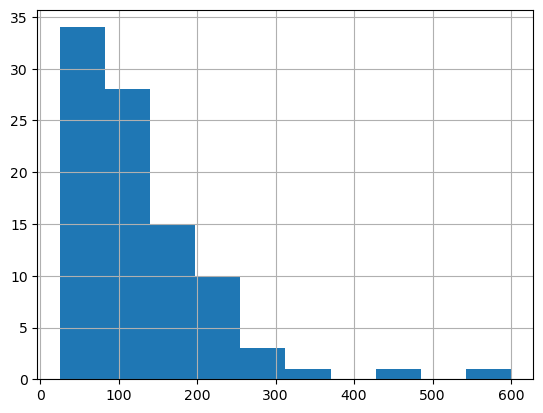

In [472]:
airbnb_clean.price.hist()

#### filter observations

In [10]:
airbnb_clean.loc[airbnb_clean["host_is_superhost"] == 1]

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
7,638155,20170304065726,3171706,Claire,2012-08-06,1.00,1,Streatham,2.0,2.0,...,10.0,9.0,9.0,0,0,strict,0,0,2,0.25
9,608438,20170304065726,3015804,J.O.,2012-07-22,1.00,1,Lambeth,4.0,4.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.61
15,1609396,20170304065726,320901,Mike,2010-12-17,1.00,1,Walworth,4.0,4.0,...,10.0,10.0,10.0,0,0,strict,0,0,4,0.10
16,1088930,20170304065726,4288805,Sarah,2012-11-30,1.00,1,Bermondsey,2.0,2.0,...,10.0,9.0,10.0,0,0,strict,1,1,2,3.29
17,816554,20170304065726,4288805,Sarah,2012-11-30,1.00,1,Bermondsey,2.0,2.0,...,10.0,9.0,10.0,0,0,strict,1,1,2,3.63
21,919953,20170304065726,4942765,Sergiy,2013-02-02,1.00,1,Forest Hill,2.0,2.0,...,9.0,8.0,9.0,0,0,strict,0,0,1,0.35
23,958137,20170304065726,2525777,Gareth,2012-06-02,1.00,1,Pimlico,2.0,2.0,...,10.0,10.0,9.0,0,0,strict,0,0,2,1.96
24,976422,20170304065726,5342604,Peter,2013-03-06,1.00,1,Richmond,4.0,4.0,...,10.0,9.0,10.0,0,0,strict,0,0,3,1.50
28,425143,20170304065726,2011372,Cagdas,2012-03-26,1.00,1,Nine Elms,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.58
30,417826,20170304065726,2077331,James,2012-04-05,1.00,1,Fulham,1.0,1.0,...,10.0,9.0,10.0,0,0,moderate,0,1,1,1.33


In [14]:
airbnb_clean.loc[airbnb_clean["price"]<100]

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,42053,20170304065726,183802,Anne,2010-07-28,1.00,0,LB of Ealing,2.0,2.0,...,10.0,10.0,10.0,0,0,strict,0,0,1,0.85
1,96052,20170304065726,448154,Aneta,2011-03-17,1.00,0,LB of Brent,1.0,1.0,...,10.0,9.0,9.0,0,0,strict,1,1,1,0.77
2,960285,20170304065726,1814506,Allan,2012-02-26,1.00,0,LB of Brent,3.0,3.0,...,9.0,9.0,9.0,0,1,strict,0,1,2,0.19
3,609973,20170304065726,3011339,Patrizia,2012-07-21,0.90,0,LB of Brent,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.55
4,428500,20170304065726,1955559,Sean,2012-03-18,0.89,0,LB of Enfield,6.0,6.0,...,10.0,9.0,9.0,0,0,moderate,0,0,6,4.41
5,581664,20170304065726,1955559,Sean,2012-03-18,0.89,0,LB of Enfield,6.0,6.0,...,10.0,9.0,9.0,0,0,moderate,0,0,6,5.34
7,638155,20170304065726,3171706,Claire,2012-08-06,1.00,1,Streatham,2.0,2.0,...,10.0,9.0,9.0,0,0,strict,0,0,2,0.25
8,281523,20170304065726,1441235,Anne Marie,2011-11-25,0.00,0,Streatham,3.0,3.0,...,9.0,10.0,10.0,0,0,strict,0,1,3,0.23
9,608438,20170304065726,3015804,J.O.,2012-07-22,1.00,1,Lambeth,4.0,4.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.61
10,2017808,20170304065726,2855954,Maria,2012-07-07,0.10,0,Brixton,1.0,1.0,...,10.0,9.0,10.0,0,0,moderate,0,0,1,0.24


In [71]:
airbnb_clean.loc[airbnb_clean["host_response_rate"] == 0.9]

,id,scrape_id,host_id,host_name,host_since,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,609973,20170304065726,3011339,Patrizia,2012-07-21,0.9,0,LB of Brent,1.0,1.0,...,10.0,10.0,9.0,0,0,strict,0,0,1,0.55
29,24328,20170304065726,41759,Joe,2009-09-28,0.9,0,Battersea,3.0,3.0,...,10.0,9.0,9.0,0,0,strict,1,1,1,1.20
42,1100472,20170304065726,5625267,Alastair,2013-03-25,0.9,0,The West End,1.0,1.0,...,10.0,10.0,9.0,0,1,strict,0,0,1,2.87
50,525736,20170304065726,2584330,Andrea,2012-06-08,0.9,0,Bayswater,1.0,1.0,...,9.0,9.0,9.0,0,0,strict,0,0,1,0.84
60,1447485,20170304065726,7769819,Chrissi,2013-07-28,0.9,1,Bethnal Green,1.0,1.0,...,10.0,10.0,10.0,0,0,moderate,1,1,1,1.70
74,2096800,20170304065726,2785469,Isa,2012-06-30,0.9,0,LB of Islington,1.0,1.0,...,10.0,9.0,10.0,0,0,moderate,0,0,1,1.11


filter variables

In [471]:
airbnb_clean.filter(["price", "beds"]).describe()

,price,beds
count,93.000000,93.000000
mean,124.806452,2.107527
std,89.911824,1.322566
min,25.000000,1.000000
25%,69.000000,1.000000
50%,99.000000,2.000000
75%,150.000000,3.000000
max,600.000000,6.000000


#### create and transform variables

In [475]:
price_low = airbnb_clean.loc[airbnb_clean["price"]<100]
price_high = airbnb_clean.loc[airbnb_clean["price"]>=100]

#### use "lists and "dictionaries" appropriately. Demonstrate one of the two

In [488]:
s = airbnb_clean["calendar_updated"]
s_det = s[4]
s_det.split(" ")[0:2]

['6', 'days']

In [500]:
wknd_options = ["coding_assignment", "movies", "hiking", "party"]
for element in wknd_options:
    print(element)
# very simple loop

coding_assignment
movies
hiking
party


In [499]:
len(wknd_options)

2

In [496]:
print([wknd_options[-4], wknd_options[3]])

['coding_assignment', 'party']


In [501]:
del wknd_options[0]
print(wknd_options)
# all done! :)

['movies', 'hiking', 'party']
